### Generate AE2CE dataset

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

import sys
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary

import datetime
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, balanced_accuracy_score

import json
from multimodal import *
from ae2ce import FusionClassifier, train_classifier, test_classifier, generate_ae2ce_data

In [2]:
from ce_generator import CE5min

### Train AE Classifier

In [3]:
# get Multimodal Fusion Embedding Dataset for training and testing
config_file = './Multimodal/dataset_config.json'
with open(config_file, 'r') as f:
    dataset_config = json.load(f)

fusion_embed_train_dataset = np.load('./Multimodal/fusion_5_audio1234_imu1234_embeddings.npz', allow_pickle=True)
fusion_embed_train_set = FusionEmbed(fusion_embed_train_dataset, dataset_config)

fusion_embed_test_dataset = np.load('./Multimodal/fusion_5_audio5_imu5_embeddings.npz', allow_pickle=True)
fusion_embed_test_set = FusionEmbed(fusion_embed_test_dataset, dataset_config)

In [4]:
len(fusion_embed_test_set)

900

In [5]:
fusion_embed_train_loader = DataLoader(fusion_embed_train_set, batch_size=128,
                            shuffle=True)
fusion_embed_test_loader = DataLoader(fusion_embed_test_set, batch_size=128,
                            shuffle=False)

In [6]:
fusion_dim = 128
n_class = dataset_config['nClasses']

fusion_classifier = FusionClassifier(fusion_dim,
                                    n_class
                                   )

print(summary(fusion_classifier))

Layer (type:depth-idx)                   Param #
FusionClassifier                         --
├─Linear: 1-1                            1,161
├─Dropout: 1-2                           --
Total params: 1,161
Trainable params: 1,161
Non-trainable params: 0


In [50]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# optimizer = torch.optim.AdamW(fusion_classifier.parameters(), lr=1e-4, betas=[0.9, 0.95], weight_decay=0.1, )
# optimizer =torch.optim.Adam(params=fusion_classifier.parameters(), lr=1e-3, weight_decay=0.1)
optimizer = None
train_classifier(fusion_classifier, fusion_embed_train_loader, lr=1e-3, n_epochs=200, optimizer=optimizer, device=device)

100%|██████████| 29/29 [00:00<00:00, 1618.35it/s]


Epoch: 0, Loss: 1.3745346028229286, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1384.18it/s]


Epoch: 1, Loss: 1.3744524059624508, Accuracy: 0.9962284482758621


  0%|          | 0/29 [00:00<?, ?it/s]

100%|██████████| 29/29 [00:00<00:00, 2063.32it/s]


Epoch: 2, Loss: 1.3744544612950291, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1952.91it/s]


Epoch: 3, Loss: 1.3744509055696685, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2060.91it/s]


Epoch: 4, Loss: 1.3744794500285182, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2005.98it/s]


Epoch: 5, Loss: 1.374490655701736, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1491.66it/s]


Epoch: 6, Loss: 1.3744628018346325, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1962.01it/s]


Epoch: 7, Loss: 1.3749025320184642, Accuracy: 0.9943426724137931


100%|██████████| 29/29 [00:00<00:00, 2035.87it/s]


Epoch: 8, Loss: 1.3744146495029843, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1930.16it/s]


Epoch: 9, Loss: 1.374452414183781, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2036.75it/s]


Epoch: 10, Loss: 1.374425403003035, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2008.70it/s]


Epoch: 11, Loss: 1.3744793883685409, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1913.73it/s]


Epoch: 12, Loss: 1.3745461044640377, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2066.48it/s]


Epoch: 13, Loss: 1.3744441558574807, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1961.95it/s]


Epoch: 14, Loss: 1.3744199645930324, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2025.86it/s]


Epoch: 15, Loss: 1.3744569893541008, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1934.00it/s]


Epoch: 16, Loss: 1.3744093385236016, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2039.59it/s]


Epoch: 17, Loss: 1.3744423225008209, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1923.54it/s]


Epoch: 18, Loss: 1.3744259826068221, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1983.09it/s]


Epoch: 19, Loss: 1.3745122366938098, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2062.13it/s]


Epoch: 20, Loss: 1.3744658971654957, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2041.40it/s]


Epoch: 21, Loss: 1.3744215513097828, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2058.26it/s]


Epoch: 22, Loss: 1.374473366244086, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1934.52it/s]


Epoch: 23, Loss: 1.374423960159565, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2032.46it/s]


Epoch: 24, Loss: 1.37444269657135, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1889.71it/s]


Epoch: 25, Loss: 1.3744586295094983, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2045.90it/s]


Epoch: 26, Loss: 1.37444754304557, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2034.88it/s]


Epoch: 27, Loss: 1.3744562453237072, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2046.48it/s]


Epoch: 28, Loss: 1.3744863970526333, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1943.05it/s]


Epoch: 29, Loss: 1.3744308126383815, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1997.98it/s]


Epoch: 30, Loss: 1.3744593858718872, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1887.65it/s]


Epoch: 31, Loss: 1.3751152466083396, Accuracy: 0.9943426724137931


100%|██████████| 29/29 [00:00<00:00, 1674.00it/s]


Epoch: 32, Loss: 1.3744582883242904, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1863.05it/s]


Epoch: 33, Loss: 1.3744875357068818, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2037.64it/s]


Epoch: 34, Loss: 1.3744306769864312, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1746.00it/s]


Epoch: 35, Loss: 1.3744345410116787, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1824.40it/s]


Epoch: 36, Loss: 1.3749310477026577, Accuracy: 0.9943426724137931


100%|██████████| 29/29 [00:00<00:00, 1772.35it/s]


Epoch: 37, Loss: 1.3744487598024566, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1953.66it/s]


Epoch: 38, Loss: 1.374410949904343, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2002.42it/s]


Epoch: 39, Loss: 1.3744301343786305, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2023.27it/s]


Epoch: 40, Loss: 1.3744595544091587, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2057.84it/s]


Epoch: 41, Loss: 1.3744287038671559, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1951.53it/s]


Epoch: 42, Loss: 1.374512220251149, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2041.16it/s]


Epoch: 43, Loss: 1.3744443983867252, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1889.38it/s]


Epoch: 44, Loss: 1.3744747803128998, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2021.45it/s]


Epoch: 45, Loss: 1.3744441928534672, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2054.85it/s]


Epoch: 46, Loss: 1.3744078751268058, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2042.91it/s]


Epoch: 47, Loss: 1.3744509590083156, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1970.43it/s]


Epoch: 48, Loss: 1.3744344300237195, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1792.46it/s]


Epoch: 49, Loss: 1.3744061116514534, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1737.69it/s]


Epoch: 50, Loss: 1.3744495778248227, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1800.77it/s]


Epoch: 51, Loss: 1.3748509924987267, Accuracy: 0.9943426724137931


100%|██████████| 29/29 [00:00<00:00, 1839.47it/s]


Epoch: 52, Loss: 1.3744234134410989, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1827.45it/s]


Epoch: 53, Loss: 1.374430726314413, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1455.47it/s]


Epoch: 54, Loss: 1.374495530950612, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2033.35it/s]


Epoch: 55, Loss: 1.3744203139995705, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1915.84it/s]


Epoch: 56, Loss: 1.374476280705682, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1821.94it/s]


Epoch: 57, Loss: 1.3744515098374466, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1833.67it/s]


Epoch: 58, Loss: 1.374421156685928, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1835.66it/s]


Epoch: 59, Loss: 1.3744474649429321, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1799.94it/s]


Epoch: 60, Loss: 1.3744123680838223, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1830.25it/s]


Epoch: 61, Loss: 1.374402876557975, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1753.95it/s]


Epoch: 62, Loss: 1.3744785456821835, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1813.20it/s]


Epoch: 63, Loss: 1.3744334393534168, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1844.40it/s]


Epoch: 64, Loss: 1.3745171037213555, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1834.39it/s]


Epoch: 65, Loss: 1.3744551518867756, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1783.58it/s]


Epoch: 66, Loss: 1.3744370608494199, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1819.68it/s]


Epoch: 67, Loss: 1.3744258798401932, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1802.08it/s]


Epoch: 68, Loss: 1.3744618234963253, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1811.90it/s]


Epoch: 69, Loss: 1.3744718411873127, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1830.14it/s]


Epoch: 70, Loss: 1.3744850939717785, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1825.94it/s]


Epoch: 71, Loss: 1.3744243465620896, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1820.06it/s]


Epoch: 72, Loss: 1.3748016686275089, Accuracy: 0.9943426724137931


100%|██████████| 29/29 [00:00<00:00, 1816.50it/s]


Epoch: 73, Loss: 1.3744172433326984, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1710.56it/s]


Epoch: 74, Loss: 1.3744192575586254, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1922.68it/s]


Epoch: 75, Loss: 1.3744131367782066, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1995.81it/s]


Epoch: 76, Loss: 1.3744565207382728, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1829.07it/s]


Epoch: 77, Loss: 1.3744310305036347, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1841.00it/s]


Epoch: 78, Loss: 1.3744214855391403, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1756.81it/s]


Epoch: 79, Loss: 1.3743976313492348, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1836.11it/s]


Epoch: 80, Loss: 1.3746778677249778, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1728.04it/s]


Epoch: 81, Loss: 1.3744175927392368, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1826.32it/s]


Epoch: 82, Loss: 1.3744644913180122, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1834.72it/s]


Epoch: 83, Loss: 1.3744145631790161, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1833.51it/s]


Epoch: 84, Loss: 1.3744355522353073, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1928.94it/s]


Epoch: 85, Loss: 1.3744523648557991, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1828.55it/s]


Epoch: 86, Loss: 1.3745435270769844, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1711.45it/s]


Epoch: 87, Loss: 1.3743823766708374, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1835.55it/s]


Epoch: 88, Loss: 1.374409893463398, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1841.61it/s]


Epoch: 89, Loss: 1.374444472378698, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1843.15it/s]


Epoch: 90, Loss: 1.3746403209094344, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1761.16it/s]


Epoch: 91, Loss: 1.374455501293314, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1839.66it/s]


Epoch: 92, Loss: 1.3744610013632939, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1729.27it/s]


Epoch: 93, Loss: 1.3744132683194916, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1828.33it/s]


Epoch: 94, Loss: 1.3744184970855713, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1716.58it/s]


Epoch: 95, Loss: 1.3744111389949405, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1979.28it/s]


Epoch: 96, Loss: 1.374391765430056, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1875.14it/s]


Epoch: 97, Loss: 1.374404080982866, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1999.98it/s]


Epoch: 98, Loss: 1.3744102757552574, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1737.81it/s]


Epoch: 99, Loss: 1.3748377027182743, Accuracy: 0.9943426724137931


100%|██████████| 29/29 [00:00<00:00, 2026.20it/s]


Epoch: 100, Loss: 1.3744287696377984, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2032.77it/s]


Epoch: 101, Loss: 1.3744109005763614, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2044.87it/s]


Epoch: 102, Loss: 1.3744474690535973, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1949.49it/s]


Epoch: 103, Loss: 1.3744787306621158, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2011.56it/s]


Epoch: 104, Loss: 1.37440628429939, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1902.48it/s]


Epoch: 105, Loss: 1.3744438640002548, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1978.19it/s]


Epoch: 106, Loss: 1.374410579944479, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2063.92it/s]


Epoch: 107, Loss: 1.3744300316120017, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2034.88it/s]


Epoch: 108, Loss: 1.3748411680090016, Accuracy: 0.9943426724137931


100%|██████████| 29/29 [00:00<00:00, 2005.32it/s]


Epoch: 109, Loss: 1.3744009239920254, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1818.89it/s]


Epoch: 110, Loss: 1.3744162978797123, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1740.05it/s]


Epoch: 111, Loss: 1.3744329131882767, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1712.85it/s]


Epoch: 112, Loss: 1.3743875972155868, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1837.44it/s]


Epoch: 113, Loss: 1.3743926944403813, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1819.06it/s]


Epoch: 114, Loss: 1.3743926533337296, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1844.27it/s]


Epoch: 115, Loss: 1.3743879959501069, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 842.86it/s]


Epoch: 116, Loss: 1.3743828000693485, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1847.01it/s]


Epoch: 117, Loss: 1.3743839058382759, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1770.62it/s]


Epoch: 118, Loss: 1.3743748007149532, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1958.13it/s]


Epoch: 119, Loss: 1.3743753885400707, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1926.31it/s]


Epoch: 120, Loss: 1.374406181532761, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1893.92it/s]


Epoch: 121, Loss: 1.374402407942147, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2002.71it/s]


Epoch: 122, Loss: 1.3744625305307323, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1861.48it/s]


Epoch: 123, Loss: 1.3743806501914715, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2009.13it/s]


Epoch: 124, Loss: 1.3748699467757652, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1978.83it/s]


Epoch: 125, Loss: 1.3743842881301354, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1997.45it/s]


Epoch: 126, Loss: 1.374422496762769, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1887.04it/s]


Epoch: 127, Loss: 1.3743997688951164, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1946.00it/s]


Epoch: 128, Loss: 1.3743725645131077, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1669.43it/s]


Epoch: 129, Loss: 1.3744090137810543, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1878.79it/s]


Epoch: 130, Loss: 1.3744743075864068, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2017.70it/s]


Epoch: 131, Loss: 1.3744213170018689, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2052.35it/s]


Epoch: 132, Loss: 1.3745278161147545, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1931.66it/s]


Epoch: 133, Loss: 1.374396061075145, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2047.66it/s]


Epoch: 134, Loss: 1.3743890277270614, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2033.45it/s]


Epoch: 135, Loss: 1.374601384689068, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1896.01it/s]


Epoch: 136, Loss: 1.3743913625848705, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2051.49it/s]


Epoch: 137, Loss: 1.374423470990411, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1932.64it/s]


Epoch: 138, Loss: 1.374387112157098, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2047.55it/s]


Epoch: 139, Loss: 1.3744860846420814, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1910.00it/s]


Epoch: 140, Loss: 1.374437924089103, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2041.37it/s]


Epoch: 141, Loss: 1.37478952161197, Accuracy: 0.9943426724137931


100%|██████████| 29/29 [00:00<00:00, 1904.86it/s]


Epoch: 142, Loss: 1.3743677139282227, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2004.56it/s]


Epoch: 143, Loss: 1.3744032629604996, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2042.46it/s]


Epoch: 144, Loss: 1.37441545108269, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 2005.19it/s]


Epoch: 145, Loss: 1.374376601186292, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1808.02it/s]


Epoch: 146, Loss: 1.3743795197585533, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1657.81it/s]


Epoch: 147, Loss: 1.3745302496285274, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1975.36it/s]


Epoch: 148, Loss: 1.3743688361398105, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1411.44it/s]


Epoch: 149, Loss: 1.374425822290881, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1781.83it/s]


Epoch: 150, Loss: 1.374391983295309, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1990.68it/s]


Epoch: 151, Loss: 1.3751774944108108, Accuracy: 0.9943426724137931


100%|██████████| 29/29 [00:00<00:00, 1769.70it/s]


Epoch: 152, Loss: 1.374398478146257, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1825.17it/s]


Epoch: 153, Loss: 1.37479278959077, Accuracy: 0.9943426724137931


100%|██████████| 29/29 [00:00<00:00, 1733.04it/s]


Epoch: 154, Loss: 1.3743682113187066, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1815.47it/s]


Epoch: 155, Loss: 1.374378150907056, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1831.90it/s]


Epoch: 156, Loss: 1.374382467105471, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1806.39it/s]


Epoch: 157, Loss: 1.3743983918222888, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1750.59it/s]


Epoch: 158, Loss: 1.3744335996693577, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1818.95it/s]


Epoch: 159, Loss: 1.3743742539964874, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1729.83it/s]


Epoch: 160, Loss: 1.3744205811928059, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1830.80it/s]


Epoch: 161, Loss: 1.3743801774649784, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1829.67it/s]


Epoch: 162, Loss: 1.3743825287654483, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1834.92it/s]


Epoch: 163, Loss: 1.3743728645916642, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1753.67it/s]


Epoch: 164, Loss: 1.3743580908610904, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1656.56it/s]


Epoch: 165, Loss: 1.374406070544802, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1715.39it/s]


Epoch: 166, Loss: 1.3743719520239994, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1800.56it/s]


Epoch: 167, Loss: 1.374375631069315, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1824.87it/s]


Epoch: 168, Loss: 1.374372124671936, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1837.80it/s]


Epoch: 169, Loss: 1.374386240696085, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1770.60it/s]


Epoch: 170, Loss: 1.3744280913780476, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1814.06it/s]


Epoch: 171, Loss: 1.3743883001393284, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1704.02it/s]


Epoch: 172, Loss: 1.3743525990124406, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1831.44it/s]


Epoch: 173, Loss: 1.374416889815495, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1825.17it/s]


Epoch: 174, Loss: 1.3743543789304535, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1796.65it/s]


Epoch: 175, Loss: 1.374389331916283, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1733.58it/s]


Epoch: 176, Loss: 1.3743710271243392, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1821.67it/s]


Epoch: 177, Loss: 1.374884761612991, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1718.18it/s]


Epoch: 178, Loss: 1.3744361523924202, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1784.97it/s]


Epoch: 179, Loss: 1.374380950270028, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1810.28it/s]


Epoch: 180, Loss: 1.3743673480790237, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1829.78it/s]


Epoch: 181, Loss: 1.3743806789661277, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1763.08it/s]


Epoch: 182, Loss: 1.3745194961284768, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1824.84it/s]


Epoch: 183, Loss: 1.374413408082107, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1751.91it/s]


Epoch: 184, Loss: 1.3743662053141101, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1811.47it/s]


Epoch: 185, Loss: 1.3743504737985546, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1829.67it/s]


Epoch: 186, Loss: 1.3743821012562718, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1812.39it/s]


Epoch: 187, Loss: 1.3744006156921387, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1742.67it/s]


Epoch: 188, Loss: 1.3743606723588089, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1824.32it/s]


Epoch: 189, Loss: 1.3744019475476494, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1715.32it/s]


Epoch: 190, Loss: 1.3743711093376423, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1778.26it/s]


Epoch: 191, Loss: 1.3743922874845307, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1757.65it/s]


Epoch: 192, Loss: 1.374408113545385, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1710.56it/s]


Epoch: 193, Loss: 1.3743575770279457, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1715.73it/s]


Epoch: 194, Loss: 1.3743890359483917, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1807.06it/s]


Epoch: 195, Loss: 1.3743603722802524, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1654.83it/s]


Epoch: 196, Loss: 1.374356430152367, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1804.56it/s]


Epoch: 197, Loss: 1.3743496927721748, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1793.92it/s]


Epoch: 198, Loss: 1.3743480032887951, Accuracy: 0.9962284482758621


100%|██████████| 29/29 [00:00<00:00, 1817.45it/s]

Epoch: 199, Loss: 1.3743512383822738, Accuracy: 0.9962284482758621


In [470]:
torch.save(fusion_classifier.state_dict(), '../baseline/saved_model/AE_classifier.pt')

In [7]:
# fusion_classifier.load_state_dict(torch.load('../baseline/saved_model/AE_classifier_old.pt'))
# fusion_classifier.load_state_dict(torch.load('../baseline/saved_model/AE_classifier.pt'))
fusion_classifier.load_state_dict(torch.load('../baseline/saved_model/AE_classifier_99.pt'))

<All keys matched successfully>

100%|██████████| 8/8 [00:00<00:00, 898.50it/s]

Loss: 1.4301990121603012, Accuracy: 0.958984375


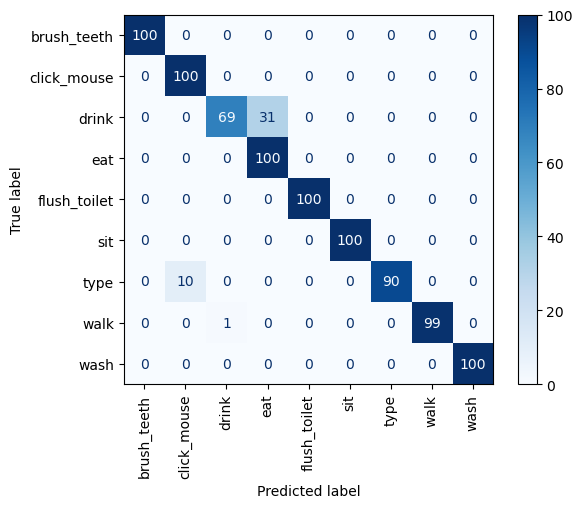

In [8]:

test_classifier(fusion_classifier, fusion_embed_test_loader, dataset_config['label_mapping'].keys(), device='cpu')

In [106]:
dataset_config['label_mapping']

{'brush_teeth': 0,
 'click_mouse': 1,
 'drink': 2,
 'eat': 3,
 'flush_toilet': 4,
 'sit': 5,
 'type': 6,
 'walk': 7,
 'wash': 8}

### Generate ae2ce dataset

In [40]:
n_train = 10000 #200 400 600 800 1000 2000 4000 6000 8000 10000

In [41]:
ce_train_data = np.load('./CE_dataset/ce5min_train_data_{}.npy'.format(n_train))
ce_train_labels = np.load('./CE_dataset/ce5min_train_labels_{}.npy'.format(n_train))

In [42]:
ae2ce_train_data, ae2ce_train_labels = generate_ae2ce_data(fusion_classifier, ce_data=ce_train_data, ce_labels=ce_train_labels)
ae2ce_train_data.shape, ae2ce_train_labels.shape

100%|██████████| 40/40 [00:00<00:00, 168.88it/s]


((10000, 60, 9), (10000, 60))

In [43]:
# id = np.random.randint(n_train)
# print(ae2ce_train_data[id], ae2ce_train_labels[id])

count_dict={0:0, 1:0, 2:0, 3:0}
for temp in ae2ce_train_labels:
    sum = np.max(temp)
    count_dict[sum] += 1

count_dict

{0: 4999, 1: 1667, 2: 1667, 3: 1667}

In [44]:
np.save('./CE_dataset/ae2ce5min_train_data_{}.npy'.format(n_train), ae2ce_train_data)
np.save('./CE_dataset/ae2ce5min_train_labels_{}.npy'.format(n_train), ae2ce_train_labels)

In [27]:
# duration = '5min'
duration = '15min'
# ce_test_data = np.load('./CE_dataset/ce5min_test_data.npy')
# ce_test_labels = np.load('./CE_dataset/ce5min_test_labels.npy')

ce_test_data = np.load(f'./CE_dataset/ce{duration}_test_data.npy')
ce_test_labels = np.load(f'./CE_dataset/ce{duration}_test_labels.npy')

In [28]:
ae2ce_test_data, ae2ce_test_labels = generate_ae2ce_data(fusion_classifier, ce_data=ce_test_data, ce_labels=ce_test_labels)
ae2ce_test_data.shape, ae2ce_test_labels.shape

100%|██████████| 4/4 [00:00<00:00, 53.05it/s]


((1000, 180, 9), (1000, 180))

In [29]:
(ae2ce_test_labels == ce_test_labels).any()

True

In [30]:
count_dict={0:0, 1:0, 2:0, 3:0}
for temp in ae2ce_test_labels:
    sum = np.max(temp)
    count_dict[sum] += 1

count_dict

{0: 499, 1: 167, 2: 167, 3: 167}

In [31]:
np.save(f'./CE_dataset/ae2ce{duration}_test_data.npy', ae2ce_test_data)
np.save(f'./CE_dataset/ae2ce{duration}_test_labels.npy', ae2ce_test_labels)

In [50]:
ce_val_data = np.load('./CE_dataset/ce5min_val_data.npy')
ce_val_labels = np.load('./CE_dataset/ce5min_val_labels.npy')

In [51]:
ae2ce_val_data, ae2ce_val_labels = generate_ae2ce_data(fusion_classifier, ce_data=ce_val_data, ce_labels=ce_val_labels)

count_dict={0:0, 1:0, 2:0, 3:0}
for temp in ae2ce_val_labels:
    sum = np.max(temp)
    count_dict[sum] += 1

count_dict

100%|██████████| 4/4 [00:00<00:00, 147.20it/s]


{0: 499, 1: 167, 2: 167, 3: 167}

In [52]:
np.save('./CE_dataset/ae2ce5min_val_data.npy', ae2ce_val_data)
np.save('./CE_dataset/ae2ce5min_val_labels.npy', ae2ce_val_labels)

# Neural + FSM

In [11]:
from fsm import *

In [34]:
# test_data = np.load('./CE_dataset/ce5min_test_data.npy') #np.load('./CE_dataset/ce5min_test_data.npy') #np.load('./CE_dataset/ce5min_train_data_1000.npy')
# test_labels = np.load('./CE_dataset/ce5min_test_labels.npy') #np.load('./CE_dataset/ce5min_test_labels.npy') #np.load('./CE_dataset/ce5min_train_labels_1000.npy')

In [35]:
# ae2ce_test_data, ae2ce_test_labels = generate_ae2ce_data(fusion_classifier, ce_data=test_data, ce_labels=test_labels)
ae2ce_test_data = np.load('./CE_dataset/ae2ce5min_test_data.npy')
ae2ce_test_labels = np.load('./CE_dataset/ae2ce5min_test_labels.npy')
ae2ce_test_data.shape, ae2ce_test_labels.shape

((1000, 60, 9), (1000, 60))

In [32]:
class_list = dataset_config['classes']

all_ce_labels = []

for i in range(len(ae2ce_test_data)):
    preds = np.argmax(ae2ce_test_data[i], axis=-1)
    print(preds)
    # print((preds==test_ae_labels[i]).all())
    fsm_list = [Event1FSM(), Event2FSM(), Event3FSM()]
    ce_labels = []

    for j in range(len(preds)):
        action_id = preds[j]
        action = class_list[action_id]


        ce_label = 0
        for fsm in fsm_list:
            l = fsm.update_state(input=action)
            if l > 0: ce_label = l
        ce_labels.append(ce_label)

    ce_labels = np.array(ce_labels)
    all_ce_labels.append(ce_labels)
    print(ce_labels)

all_ce_labels = np.concatenate(all_ce_labels)
all_true_labels = ae2ce_test_labels.reshape(-1)
print(all_true_labels.shape)


[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 4 7 8 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 6 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 7 7 7 7 7 7 7 7 7 7 7 7 7 7 2 7
 5 5 5 5 5 5 5 5 5 5 5 5 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 

In [33]:
id = np.random.randint(60000)
count_dict={0:0, 1:0, 2:0, 3:0}
for temp in all_ce_labels:
    sum = np.max(temp)
    count_dict[sum] += 1

count_dict

{0: 178834, 1: 167, 2: 832, 3: 167}

In [34]:
accuracy = accuracy_score(all_true_labels, all_ce_labels)
f1_all = f1_score(all_true_labels, all_ce_labels, average='macro')
f1_pos = f1_score(all_true_labels, all_ce_labels, labels=[1,2,3], average='macro')
f1 = f1_score(all_true_labels, all_ce_labels, average=None)

precision = precision_score(all_true_labels, all_ce_labels, average=None)
recall = recall_score(all_true_labels, all_ce_labels, average=None)
precision_avg = precision_score(all_true_labels, all_ce_labels, average='macro')
recall_avg = recall_score(all_true_labels, all_ce_labels, average='macro')

print('CE labels - Accuracy: {}, F1_all: {}, F1_positive: {}, F1:{}, Precision: {}, Avg_P: {}, Recall: {}, Avg_R: {}'.format(
                                                                                                            accuracy,
                                                                                                            f1_all,
                                                                                                            f1_pos,
                                                                                                            f1,
                                                                                                            precision,
                                                                                                            precision_avg,
                                                                                                            recall,
                                                                                                            recall_avg
                                                                                                            ))

# Sample-wise evaluation
# simple_f1_all = f1_score(y_true=all_simple_labels, y_pred=all_simple_labels_pred, average='macro')
# acc_score = accuracy_score(y_true=all_simple_labels, y_pred=all_simple_labels_pred)
# balanced_acc_score = balanced_accuracy_score(y_true=all_simple_labels, y_pred=all_simple_labels_pred)
# cm = confusion_matrix(y_true=all_simple_labels, y_pred=all_simple_labels_pred)
# cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No_Event", "CE_1", "CE_2", "CE_3"])
# cm_display.plot(cmap=plt.cm.Blues)
# plt.savefig(save_fig_dir) 

# print('CE labels sample level - Accuracy: {}, Balanced_Accuracy: {}, F1_all: {}'.format(acc_score,
#                                                                             balanced_acc_score,
#                                                                             simple_f1_all
#                                                                             ))

CE labels - Accuracy: 0.9964, F1_all: 0.841344750012559, F1_positive: 0.7890625, F1:[0.9981915 1.        0.3671875 1.       ], Precision: [0.99997763 1.         0.22596154 1.        ], Avg_P: 0.8064847928375347, Recall: [0.99641174 1.         0.97916667 1.        ], Avg_R: 0.9938946007964014
